<a href="https://colab.research.google.com/github/hwarang97/book_pytorch_deeplearning_programming/blob/main/chapter8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ref: https://github.com/wikibook/pytorchdl2/tree/main/notebooks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

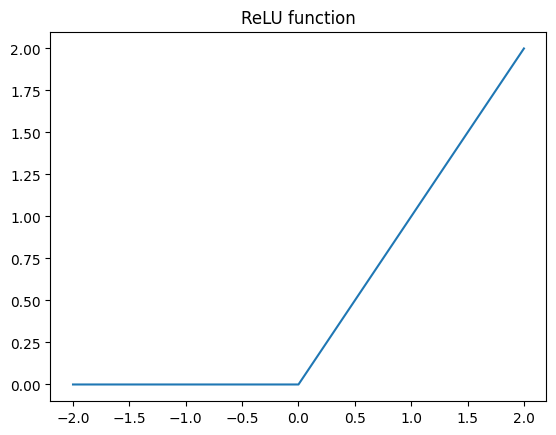

In [ ]:
# ReLU implement

relu = nn.ReLU()
x_np = np.arange(-2, 2.1, 0.25)
x = torch.tensor(x_np).float()
y = relu(x)

plt.plot(x.data, y.data)
plt.title("ReLU function")
plt.show()

In [ ]:
# 디바이스 할당
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
x_np = np.arange(-2.0, 2.1, 0.25)
y_np = np.arange(-1.0, 3.1, 0.25)
x = torch.tensor(x_np).float()
y = torch.tensor(y_np).float()

z = x * y
print(z)

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000])


In [ ]:
print('x: ', x.device)

x = x.to(device)
print('x: ', x.device)

x:  cpu
x:  cuda:0


In [ ]:
z = x * y # RuntimeError

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [ ]:
y = y.to(device)

z = x * y # success

In [5]:
import torchvision.datasets as dataset

data_root = './data'

train_set0 = dataset.MNIST(
    # 원본 데이터가 담긴 경로
    root = data_root,
    # 훈련인지 검증인지를 선택
    train = True,

    download = True
)

In [ ]:
!ls -lR ./data/MNIST

./data/MNIST:
total 4
drwxr-xr-x 2 root root 4096 Nov  6 20:31 raw

./data/MNIST/raw:
total 65012
-rw-r--r-- 1 root root  7840016 Nov  6 20:31 t10k-images-idx3-ubyte
-rw-r--r-- 1 root root  1648877 Nov  6 20:31 t10k-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    10008 Nov  6 20:31 t10k-labels-idx1-ubyte
-rw-r--r-- 1 root root     4542 Nov  6 20:31 t10k-labels-idx1-ubyte.gz
-rw-r--r-- 1 root root 47040016 Nov  6 20:31 train-images-idx3-ubyte
-rw-r--r-- 1 root root  9912422 Nov  6 20:31 train-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    60008 Nov  6 20:31 train-labels-idx1-ubyte
-rw-r--r-- 1 root root    28881 Nov  6 20:31 train-labels-idx1-ubyte.gz


In [ ]:
print('데이터 건수 : ', len(train_set0))

# 첫 번째 요소(이미지, 레이블)
image, label = train_set0[0]

print('입력 데이터 타입: ', type(image))
print('정답 데이터 타입: ', type(label))

데이터 건수 :  60000
입력 데이터 타입:  <class 'PIL.Image.Image'>
정답 데이터 타입:  <class 'int'>


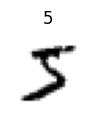

In [ ]:
plt.figure(figsize=(1,1))
plt.title(f'{label}')
plt.imshow(image, cmap='gray_r')
plt.axis('off')
plt.show()

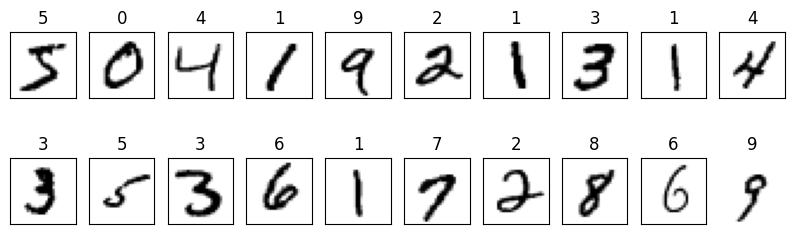

In [ ]:
figure = plt.figure(figsize=(10,3))
for i in range(20):
  ax = plt.subplot(2, 10, i+1)

  image, label = train_set0[i]
  ax.set_title(f'{label}')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  plt.imshow(image, cmap='gray_r')

plt.axis('off')
plt.show()

In [6]:
import torchvision.transforms as transforms

transform1 = transforms.Compose([
    transforms.ToTensor(),
])

train_set1 = dataset.MNIST(
    root=data_root, train=True, download=True,
    transform = transform1
)

In [ ]:
image, label = train_set1[0]
print('입력 데이터 타입 : ', type(image)) # 변경 전에는 PIL.Image.Image
print('입력 데이터 shape : ', image.shape)
print('입력 최소값 : ', image.data.min())
print('입력 최대값 : ', image.data.max())

입력 데이터 타입 :  <class 'torch.Tensor'>
입력 데이터 shape :  torch.Size([1, 28, 28])
입력 최소값 :  tensor(0.)
입력 최대값 :  tensor(1.)


In [ ]:
transform2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
])

train_set2 = dataset.MNIST(
    root=data_root, train=True, download=True,
    transform = transform2
)

In [ ]:
image, lable = train_set2[0]
print('shape : ', image.shape)
print('min : ', image.data.min())
print('max : ', image.data.max())

shape :  torch.Size([1, 28, 28])
min :  tensor(-1.)
max :  tensor(1.)


In [8]:
transform3 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.Lambda(lambda x: x.view(-1))
])

train_set3 = dataset.MNIST(
    root=data_root, train=True, download=True,
    transform=transform3)

In [9]:
image, label = train_set3[0]
print('shape :', image.shape)
print('최솟값 : ', image.data.min())
print('최댓값 : ', image.data.max())

shape : torch.Size([784])
최솟값 :  tensor(-1.)
최댓값 :  tensor(1.)


In [10]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.Lambda(lambda x: x.view(-1)),
])

train_set = dataset.MNIST(
    root=data_root, train=True, download=True, transform=transform
)

test_set = dataset.MNIST(
    root=data_root, train=False, download=True, transform=transform
)

In [11]:
from torch.utils.data import DataLoader

batch_size = 500

train_loader = DataLoader(
    dataset=train_set, batch_size=batch_size, shuffle=True
)

test_loader = DataLoader(
    dataset=test_set, batch_size=batch_size, shuffle=False
)

In [14]:
print(len(train_loader)) # 120 (60_000 / 500)

for images, labels in train_loader:
  break

print(images.shape)
print(labels.shape)

120
torch.Size([500, 784])
torch.Size([500])


In [ ]:
# 이미지 출력
plt.figure(figsize=(10, 3))
for i in range(20):
    ax = plt.subplot(2, 10, i + 1)

    # 넘파이로 배열로 변환
    image = images[i].numpy()
    label = labels[i]

    # 이미지의 범위를 [0, 1] 로 되돌림
    image2 = (image + 1)/ 2

    # 이미지 출력
    plt.imshow(image2.reshape(28, 28),cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()